In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N,n,m = x_train.shape
x_train = np.reshape(x_train,(N,n,m,1))

N,n,m = x_test.shape
x_test = np.reshape(x_test,(N,n,m,1))

In [23]:
def displayConvLayer(layer_name):
    weights = layer_name.get_weights
    weights = layer_name.weights[0]
    for i in range(weights.shape[-1]):
        for j in range(weights.shape[-2]):
            weight = np.reshape(weights[:,:,j,i].numpy(),(5,5))
            plt.imshow(weight)
            plt.show()

In [6]:
model = models.Sequential()
conv1 = layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28 ,1))
model.add(conv1)
model.add(layers.MaxPooling2D((2, 2)))
conv2 = layers.Conv2D(16, (5, 5), activation='relu')
model.add(conv2)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(input_shape=(5, 5, 16)))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

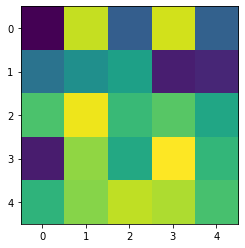

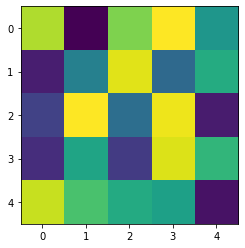

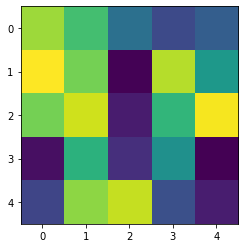

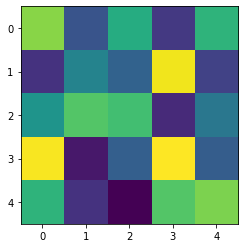

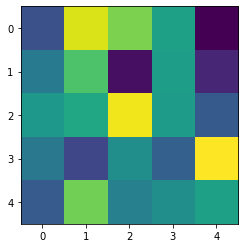

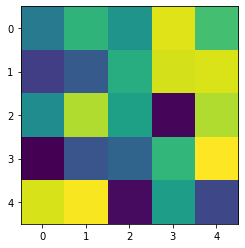

In [22]:
displayConvLayer(conv1)

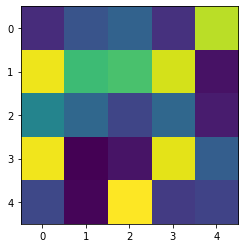

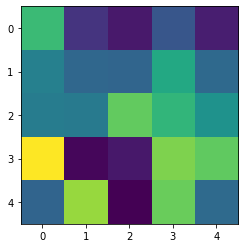

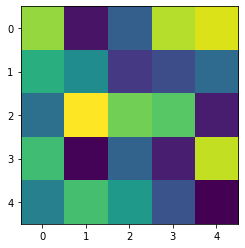

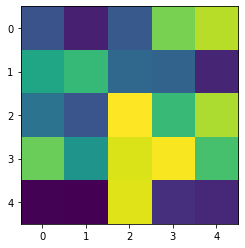

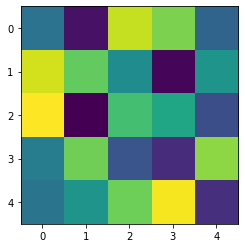

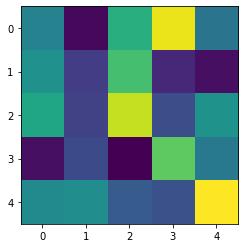

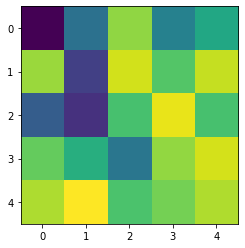

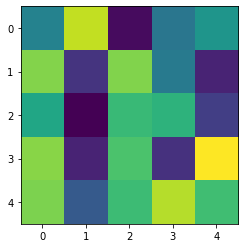

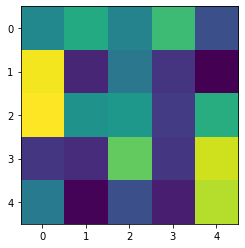

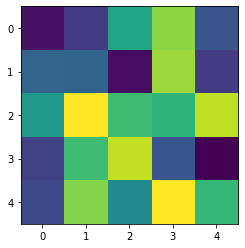

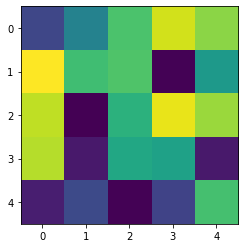

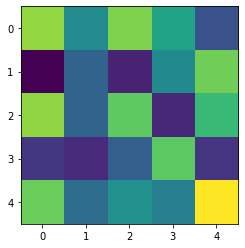

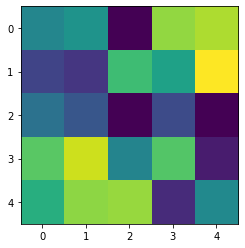

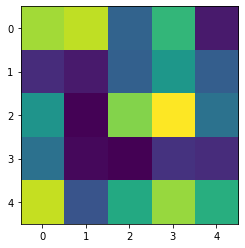

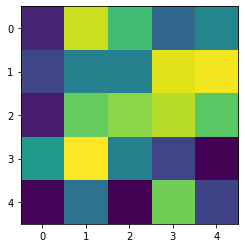

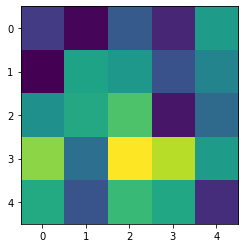

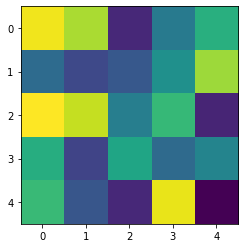

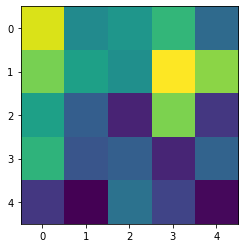

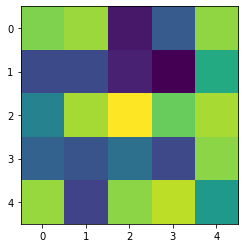

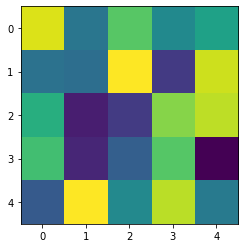

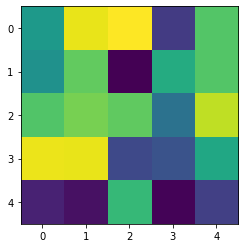

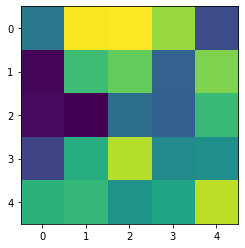

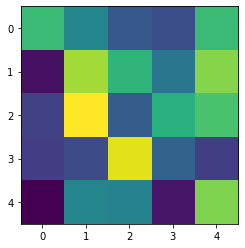

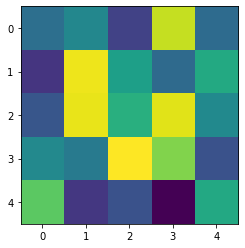

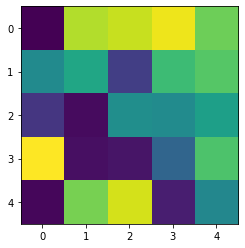

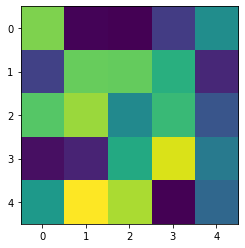

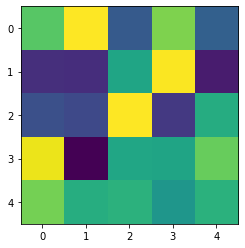

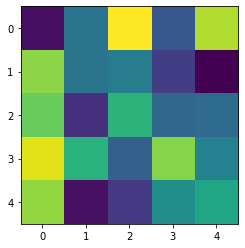

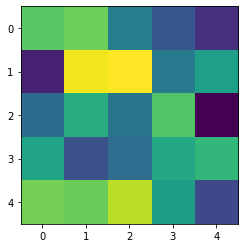

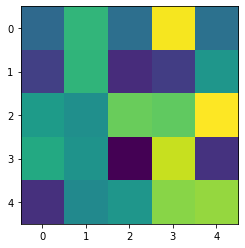

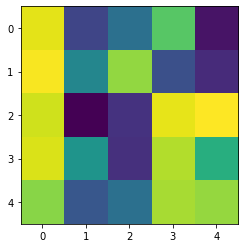

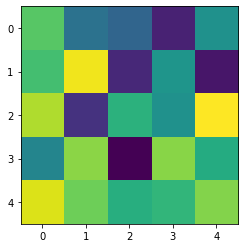

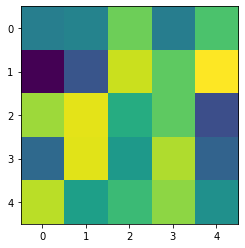

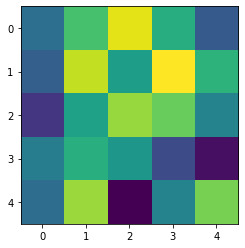

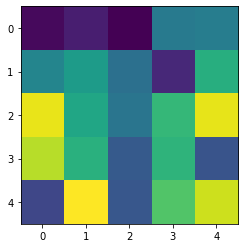

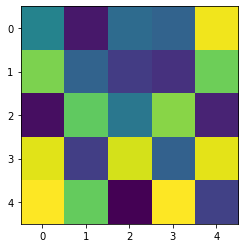

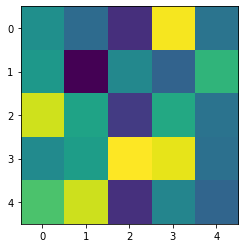

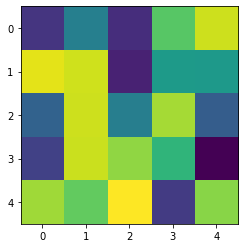

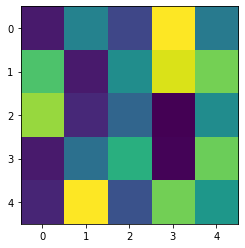

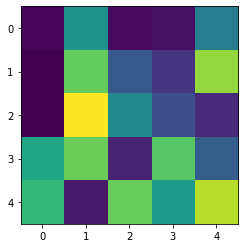

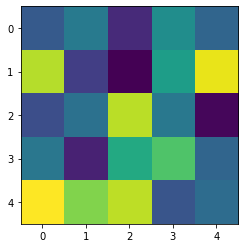

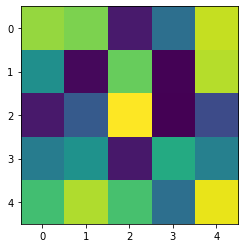

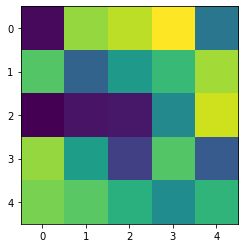

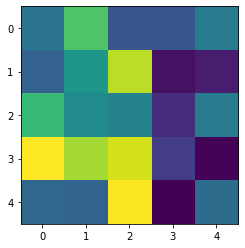

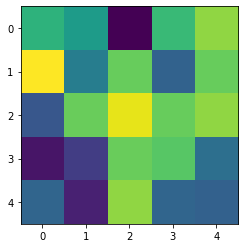

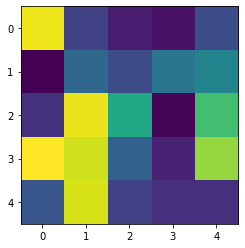

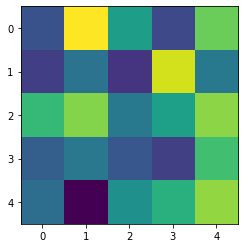

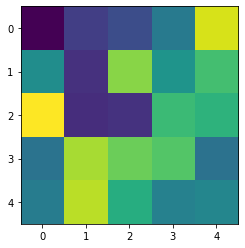

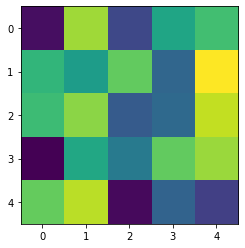

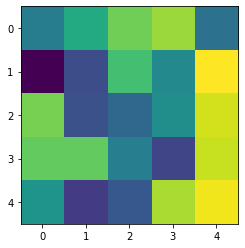

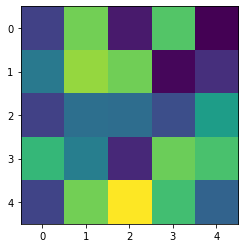

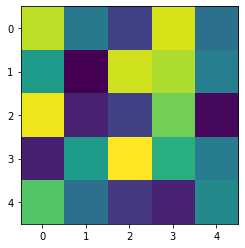

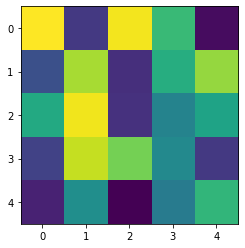

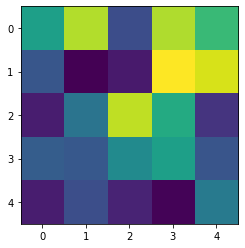

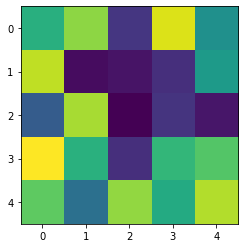

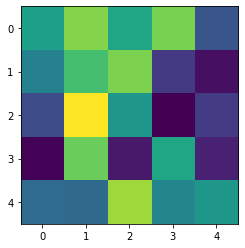

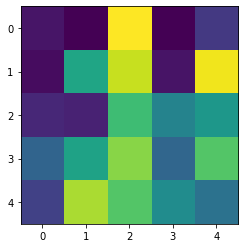

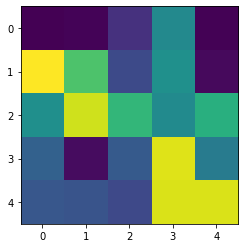

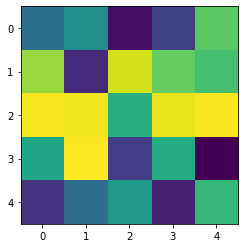

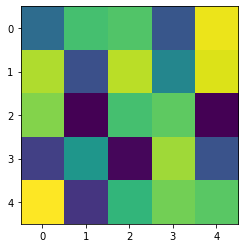

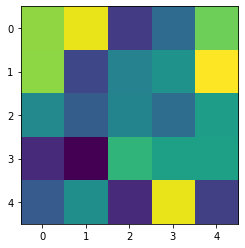

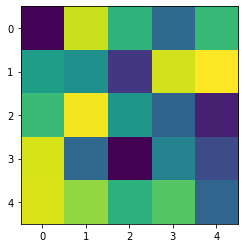

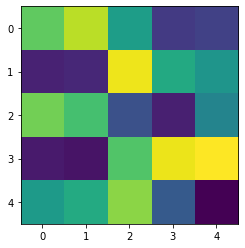

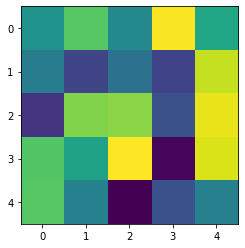

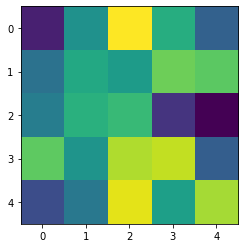

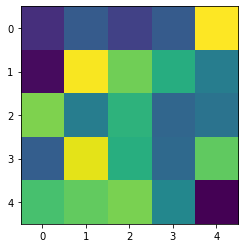

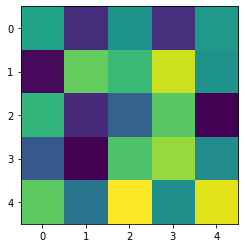

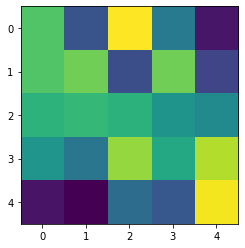

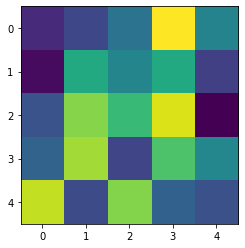

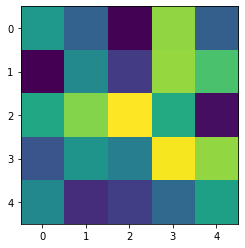

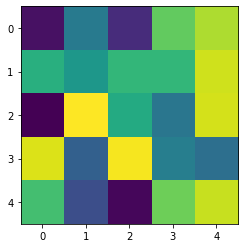

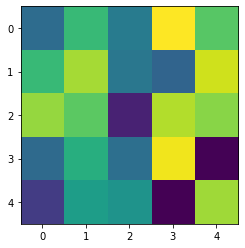

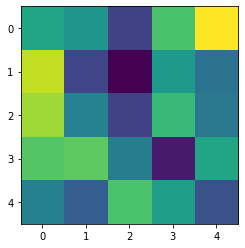

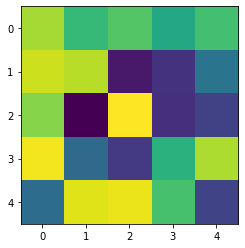

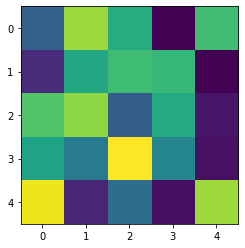

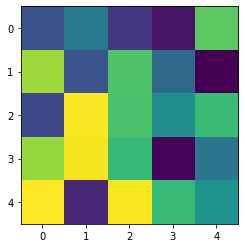

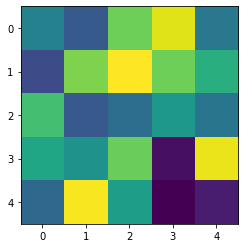

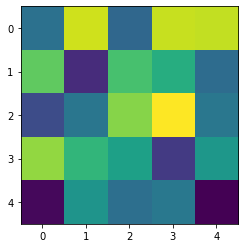

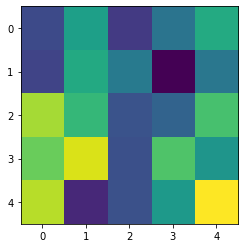

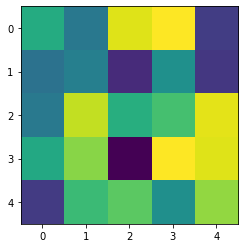

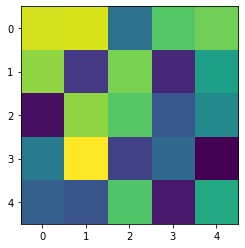

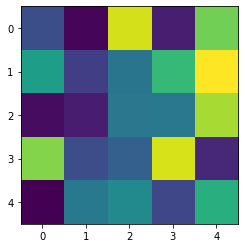

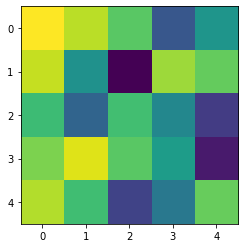

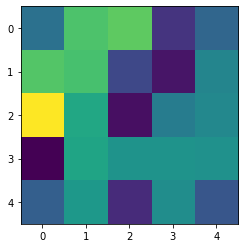

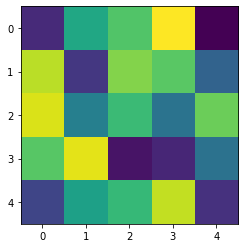

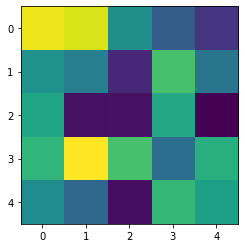

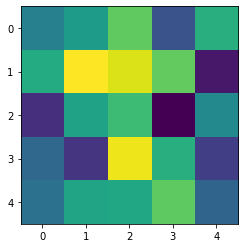

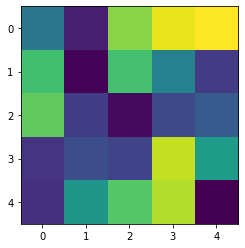

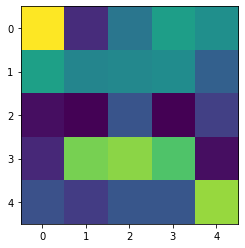

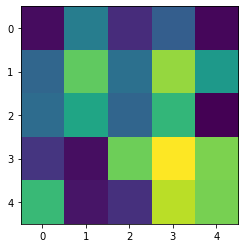

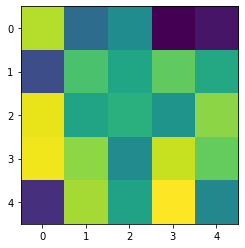

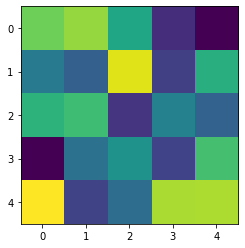

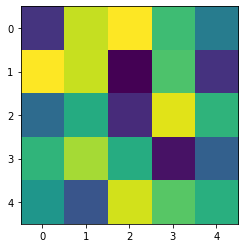

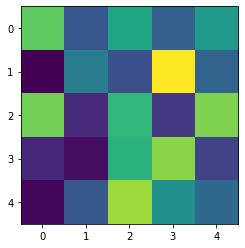

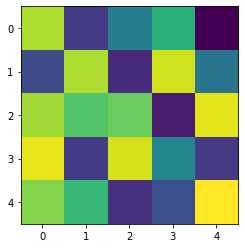

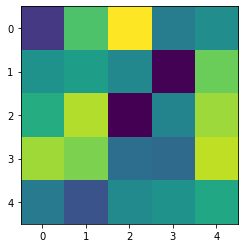

In [24]:
displayConvLayer(conv2)

In [183]:
history = model.fit(x_train, tf.one_hot(y_train,10), batch_size  = 1024, epochs=4,
          validation_data=(x_test, tf.one_hot(y_test,10)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 23s 380us/sample - loss: 0.1147 - accuracy: 0.9635 - val_loss: 0.0753 - val_accuracy: 0.9760
Epoch 2/4
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0706 - val_accuracy: 0.9772
Epoch 3/4
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0645 - val_accuracy: 0.9786
Epoch 4/4
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.0614 - val_accuracy: 0.9802


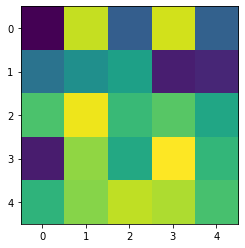

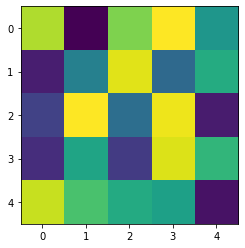

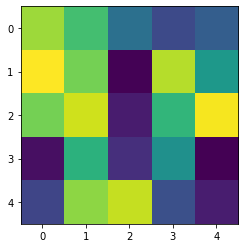

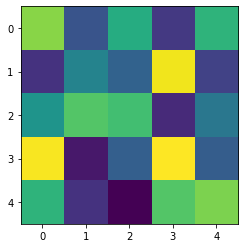

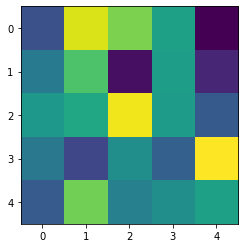

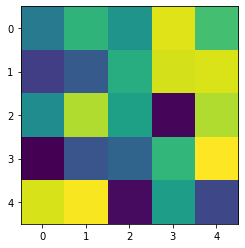

In [25]:
displayConvLayer(conv1)

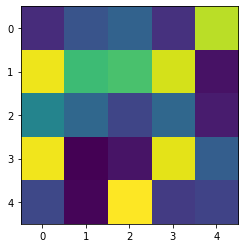

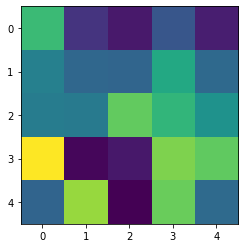

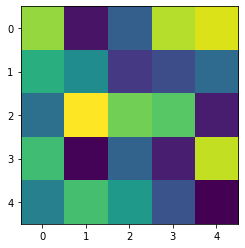

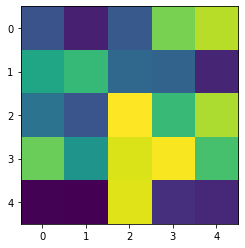

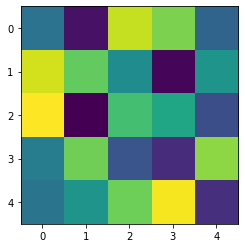

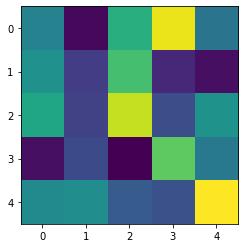

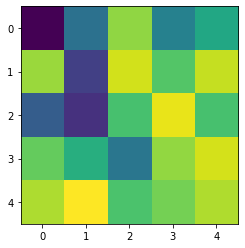

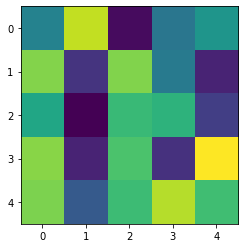

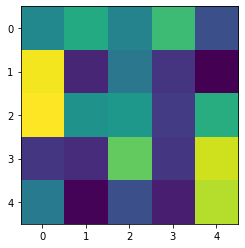

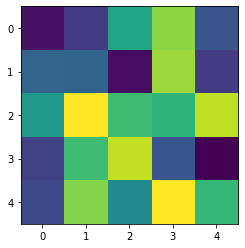

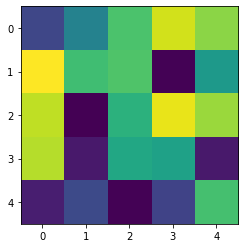

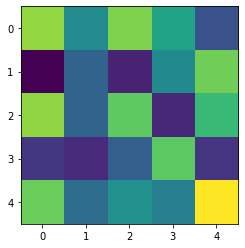

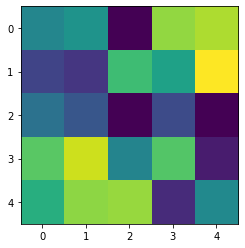

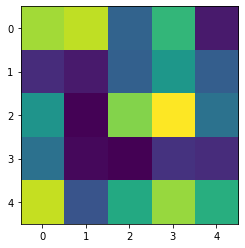

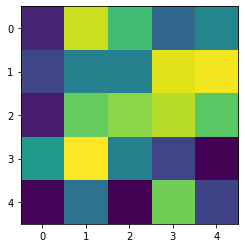

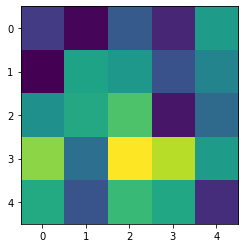

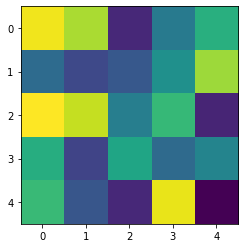

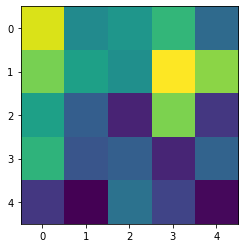

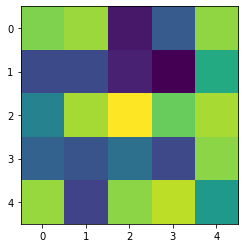

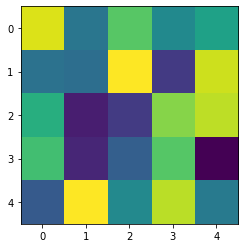

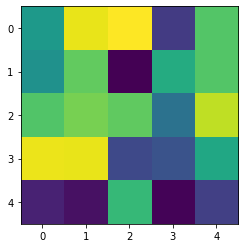

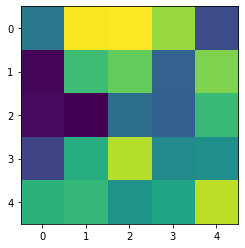

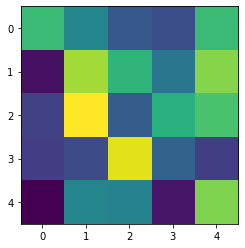

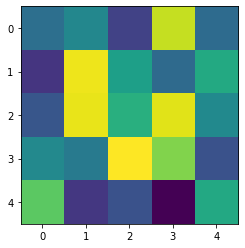

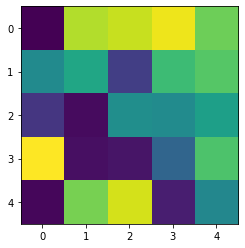

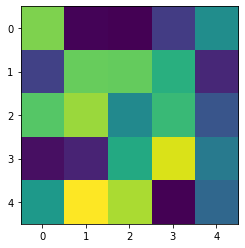

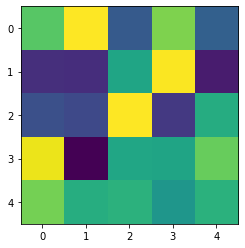

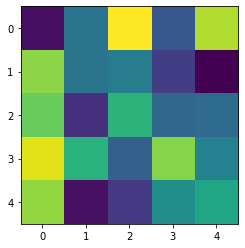

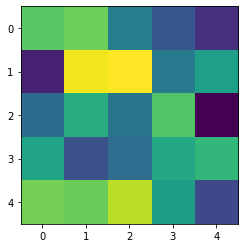

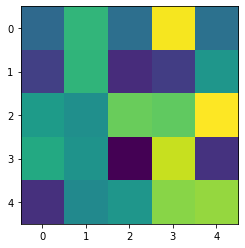

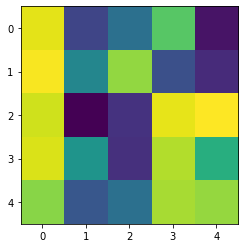

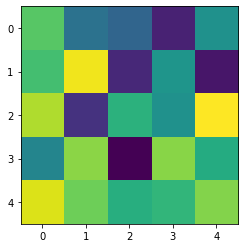

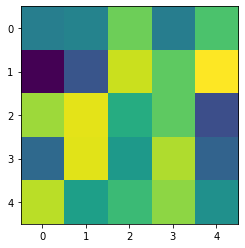

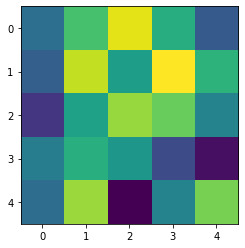

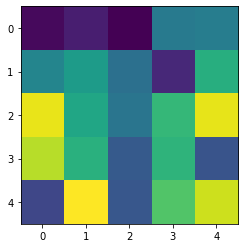

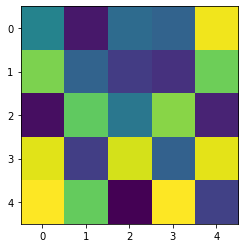

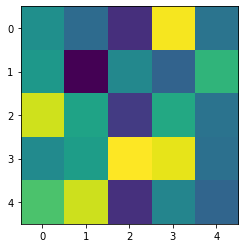

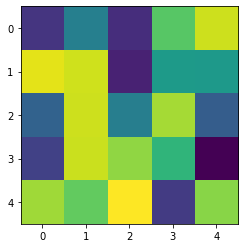

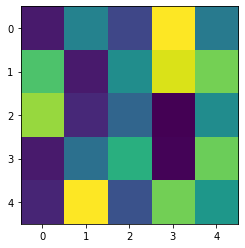

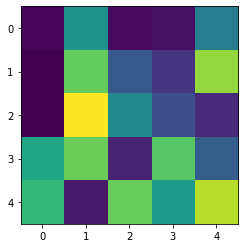

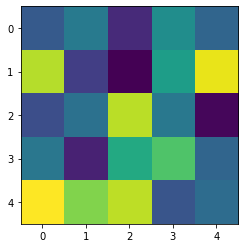

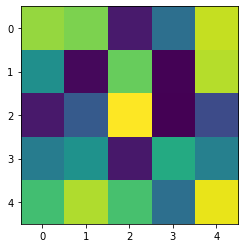

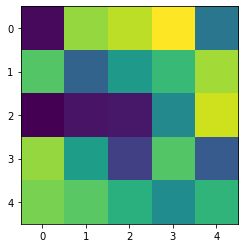

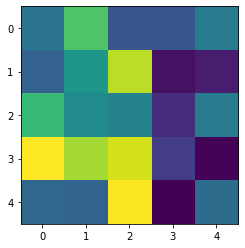

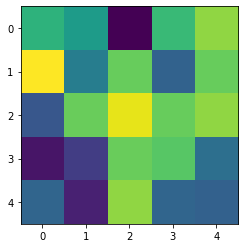

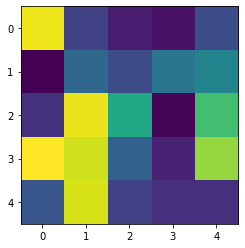

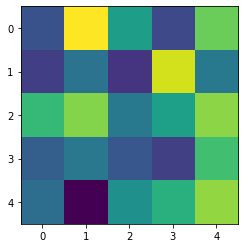

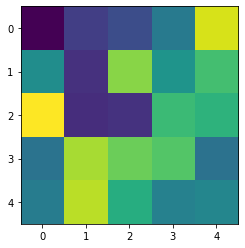

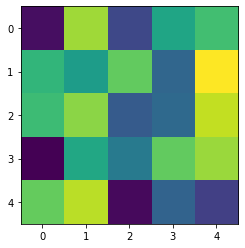

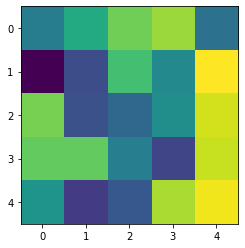

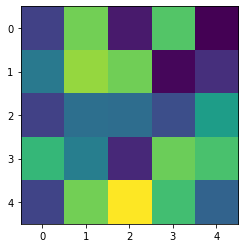

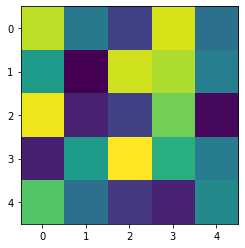

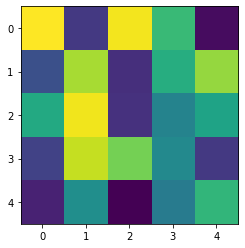

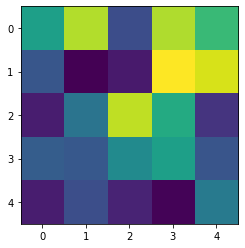

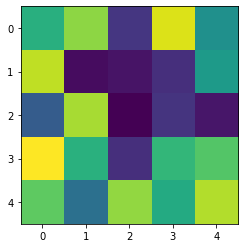

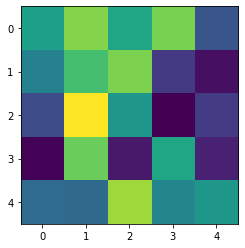

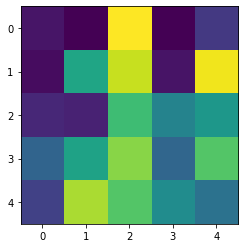

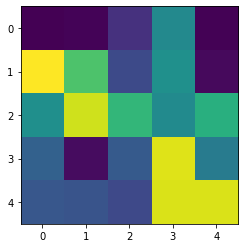

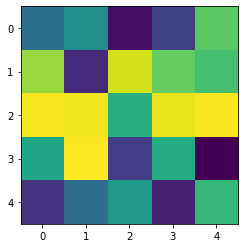

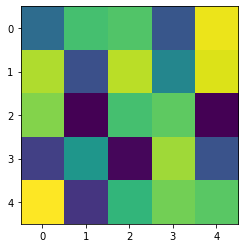

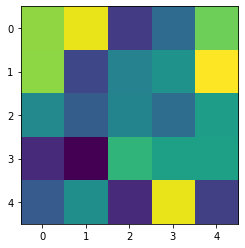

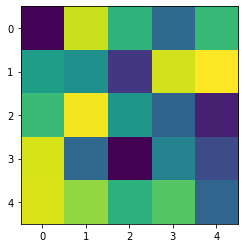

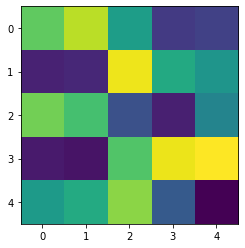

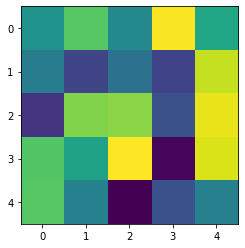

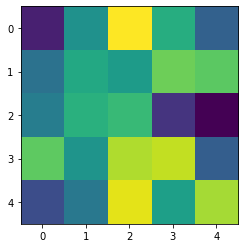

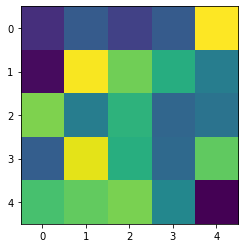

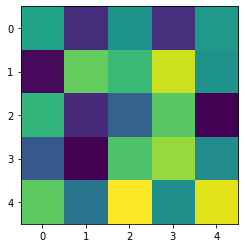

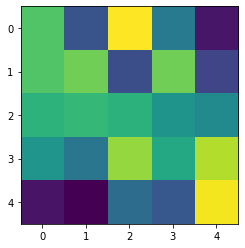

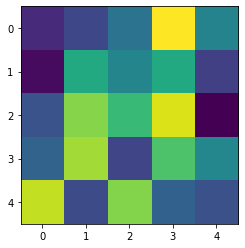

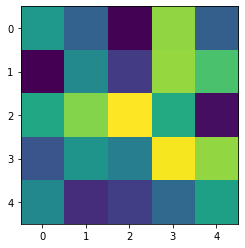

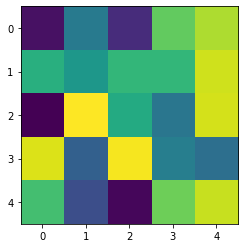

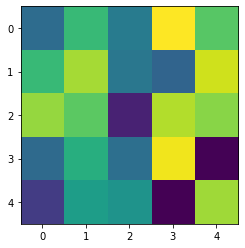

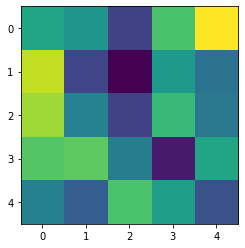

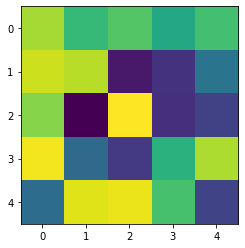

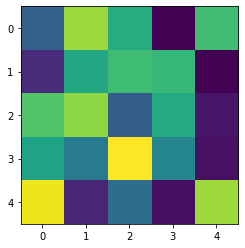

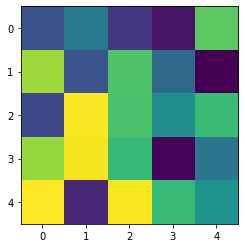

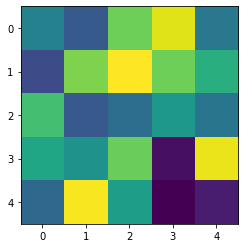

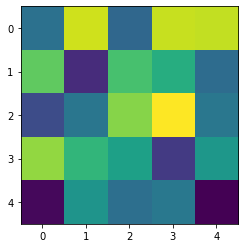

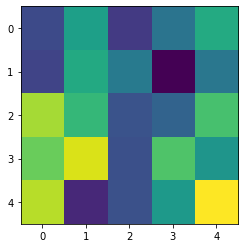

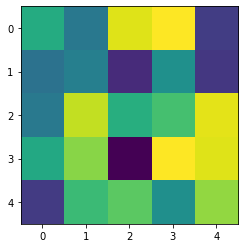

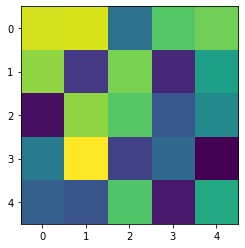

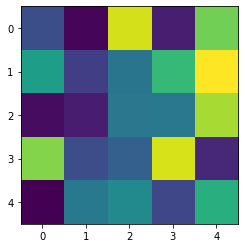

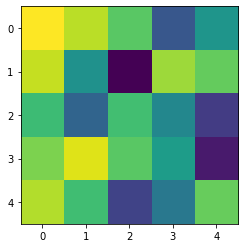

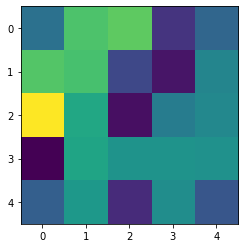

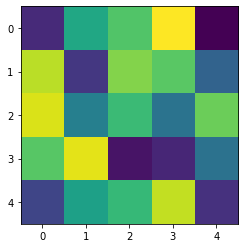

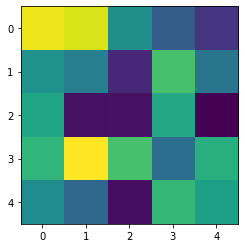

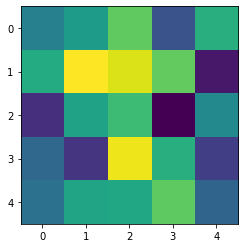

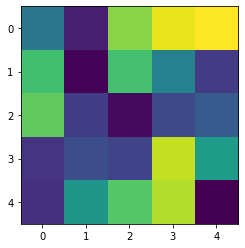

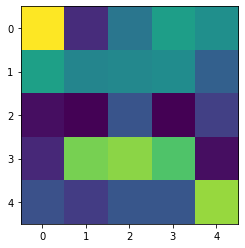

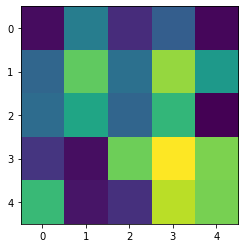

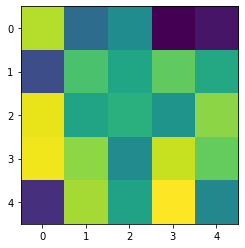

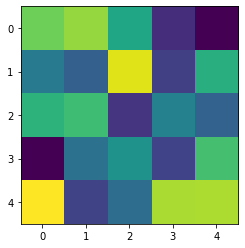

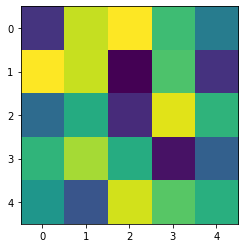

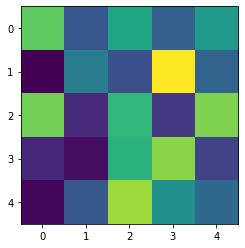

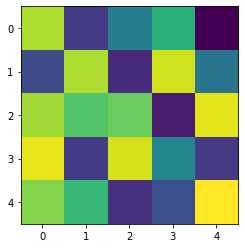

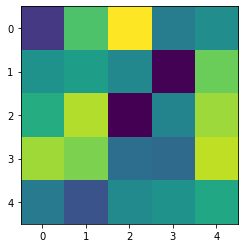

In [26]:
displayConvLayer(conv2)

10000/1 - 2s - loss: 0.0538 - accuracy: 0.9700


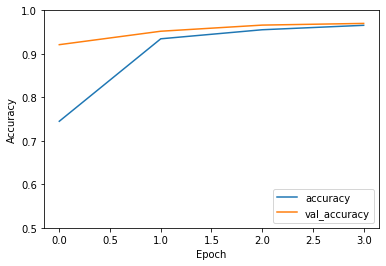

In [180]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  tf.one_hot(y_test,10), verbose=2)